# Домашнее задание "Продвинутая линейная алгебра".

In [2]:
import numpy as np

### Уровень 0:

Придумайте матрицы, которые обладают следующими свойствами:

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

a) Диагональная, ортогональная, но не единичная(!)

In [11]:
A = np.diag([-1,1,1])
print(A)
A_T = A.T
print(A_T)
print(A_T @ A)

[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


b) Верхнетреугольная, ортогональная

In [16]:
A = np.tril([[1,0,0], [0,1,0], [0,0,1]], 0)
print(A)
A_T = A.T
print(A_T)
print(A_T @ A)

[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


c) Нижнетреугольная, ортогональная

In [17]:
A = np.triu([[1,0,0], [0,1,0], [0,0,1]], 0)
print(A)
A_T = A.T
print(A_T)
print(A_T @ A)

[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


d) Матрица, у которой определитель = 1, и все элементы не равны 0

In [30]:
A = np.array([[1,1,3], [1,1,1], [0.5,1,1]])
print(A)
det = np.linalg.det(A)
print('Определитель = ', det)

[[1.  1.  3. ]
 [1.  1.  1. ]
 [0.5 1.  1. ]]
Определитель =  1.0


Найдите собственные значения и собственные вектора матриц:

```
m = np.array([[2, 2],
              [1, 3]])
print(m)
```

In [31]:
A = np.array([[2, 2],
              [1, 3]])
print(A)

[[2 2]
 [1 3]]


In [37]:
w, v = np.linalg.eig(A)

print(w)
print(v, '\n')

for i in range(len(w)):
    print("Собственное значение ", w[i])
    print("соответствующий ему собственный вектор ", v[:,i])

[1. 4.]
[[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]] 

Собственное значение  1.0
соответствующий ему собственный вектор  [-0.89442719  0.4472136 ]
Собственное значение  4.0
соответствующий ему собственный вектор  [-0.70710678 -0.70710678]


### Уровень 1:


Найдите спектральное разложение матрицы:

```
m = np.array([[1, 2],
              [2,3]])
print(m)
```


In [38]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [42]:
a, U = np.linalg.eig(m)
print('Собственное значение:')
print(np.array(a, dtype=float))
print('\nСобственные вектора:')
print(U)

Собственное значение:
[-0.23606798  4.23606798]

Собственные вектора:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [41]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1. 2.]
 [2. 3.]]


Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*




In [43]:
from matplotlib import pyplot as plt

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [57]:
X, y = load_digits(return_X_y=True)

In [59]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)



--------------------------------------------------------------------------------

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации.
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.

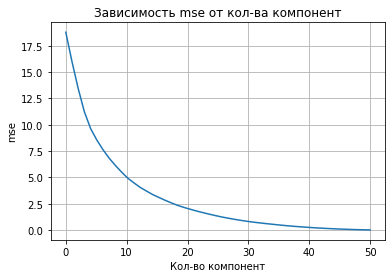

In [66]:
val_mse = []

for i in range(0, 50):
    pca = PCA(n_components=i)
    pca.fit(X)
    X_trans  = pca.transform(X)
    X_inv = pca.inverse_transform(X_trans)
    mse = mean_squared_error(X_inv, X)
    val_mse.append(mse)

x = np.linspace(0, 50)
y = val_mse

plt.title("Зависимость mse от кол-ва компонент") 
plt.xlabel("Кол-во компонент")
plt.ylabel("mse") 
plt.grid() 
plt.plot(x, y)

В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - Документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html - Документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
